### Datamining da base de dados Serviçosxis.db

Carrega abase e manipula dados para entendimento do conteúdo

Carlos Ramires
de 25/10/2023
a 31/10/2023


In [34]:
import sqlite3
import pandas as pd

# Carrega a tabela servicos da base servicosxis.db para um dataframe

# Cria a conexão
cnx = sqlite3.connect('servicosxis.db')

# carrega tabela servicos em df
df = pd.read_sql_query("SELECT * FROM serv_campo", cnx)

cnx.close()

In [35]:
# Identifica as quantidades de dados iguais
fluxos = df['Fluxo'].value_counts()
topicos = df['Topico'].value_counts()

display(fluxos)
display(topicos)

SOLICITAÇÃO DE REPARO           24711
NOVA VENDA                      22619
RETIRADA DE EQUIPAMENTO         14700
MUDANÇA DE ENDEREÇO              2179
PREVENTIVA                       1495
MUDANÇA DE ENDEREÇO               758
REMANEJAMENTO DE EQUIPAMENTO      281
REMANEJAMENTO EQUIPAMENTO         243
RETIRADA DE SUSPENSÃO TEMP.        88
Name: Fluxo, dtype: int64

(VisitaTécnica) Visita Técnica                        26730
(Instalação) proceder Instalação                      22407
(RetiradaEquip) Retirada de equipamento               14700
(Inst. Mud Ender) Instalação - Mudança de Endereço     2866
(Reagenda Inst) Reagendamento Instalação                283
(RetirSuspTemp) Retirada de Suspensão Temporária         88
Name: Topico, dtype: int64

In [36]:
# calcular o tempo entre inicio e encerramento do chamado e gravar em Duração

# converte data e hora no formato datatime
df['Abertura_DataHora'] = pd.to_datetime(df['Abertura_DataHora'])
df['Encerramento_DataHora'] = pd.to_datetime(df['Encerramento_DataHora'])
df['Duracao'] = (df['Encerramento_DataHora'] - df['Abertura_DataHora']).dt.total_seconds()/60
df['Duracao'] = df['Duracao'].round(2)
display(df)

,Unidade,Numero,Protocolo,Abertura_DataHora,Topico,Topico_Codigo,Encerramento_DataHora,Causa,Fluxo,Usuario_Designado,Encerramento_Usuario,Encerramento_Data,Encerramento_Hora,Duracao
0,NGA,6,2020000000000001,2020-03-25 10:22:17,(Instalação) proceder Instalação,12,2020-03-26 10:15:16,(Instalação OK) Instalação Realizada,NOVA VENDA,carlos.augusto,carlos.augusto,2020-03-26,10:15:16,1432.98
1,NGA,8,2020000000000003,2020-03-25 10:42:42,(Instalação) proceder Instalação,12,2020-03-26 10:15:16,(Instalação OK) Instalação Realizada,NOVA VENDA,alessandro.pereira,alessandro.pereira,2020-03-26,10:15:16,1412.57
2,NGA,18,2020000000000015,2020-03-26 11:27:28,(Instalação) proceder Instalação,12,2020-03-27 08:59:58,(Instalação OK) Instalação Realizada,NOVA VENDA,alessandro.pereira,alessandro.pereira,2020-03-27,08:59:58,1292.50
3,NGA,21,2020000000000020,2020-03-26 14:45:26,(Inst. Mud Ender) Instalação - Mudança de Ende...,79,2020-03-26 14:53:09,(Instalação OK) Instalação Realizada,MUDANÇA DE ENDEREÇO,victor.rosa,victor.rosa,2020-03-26,14:53:09,7.72
4,NGA,31,2020000000000025,2020-03-26 16:00:08,(Instalação) proceder Instalação,12,2020-03-26 19:59:24,(Instalação OK) Instalação Realizada,NOVA VENDA,carlos.augusto,carlos.augusto,2020-03-26,19:59:24,239.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67069,NAA,7342,2023000000007342,2023-07-26 00:03:03,(RetiradaEquip) Retirada de equipamento,33,2023-07-26 16:32:58,(Equip Não Retir) Equipamento Não Retirado Cli...,RETIRADA DE EQUIPAMENTO,michael.cruz,michael.cruz,2023-07-26,16:32:58,989.92
67070,NAA,7349,2023000000007344,2023-07-27 08:48:12,(VisitaTécnica) Visita Técnica,42,2023-07-27 08:52:32,(Desistência) Cliente Desistiu da Solicitação,REMANEJAMENTO DE EQUIPAMENTO,michael.cruz,michael.cruz,2023-07-27,08:52:32,4.33
67071,NAA,7355,2023000000007354,2023-07-28 14:30:12,(Inst. Mud Ender) Instalação - Mudança de Ende...,46,2023-07-28 14:47:07,(Instalação OK) Instalação Realizada,MUDANÇA DE ENDEREÇO,michael.cruz,michael.cruz,2023-07-28,14:47:07,16.92
67072,NAA,7357,2023000000007346,2023-07-29 07:25:55,(Inst. Mud Ender) Instalação - Mudança de Ende...,46,2023-07-29 07:48:01,(Instalação OK) Instalação Realizada,MUDANÇA DE ENDEREÇO,michael.cruz,michael.cruz,2023-07-29,07:48:01,22.10


In [59]:

# 
# lista das médias totais de serviços por unidade

print('______________Serviços Totais_______________________')    
serv_total = df['Topico'].value_counts()
display(serv_total)

# filtrando somente os dados de ALG

serv_alg = df['Unidade'] == 'ALG'
serv_alg = df[serv_alg]

# cria uma coluna no Ano_Mes no df serv_alg
serv_alg['Ano_Mes'] =serv_alg['Encerramento_DataHora'].dt.to_period('M')


# contando os serviços de ALG
serv_total_alg = serv_alg['Topico'].value_counts()
print('______________Serviços de ALG_______________________')
display(serv_total_alg)

# filtrando somente Visita Técnica em ALG
visita_tecnica_alg = serv_alg['Topico'] == '(VisitaTécnica) Visita Técnica'
visita_tecnica_alg = serv_alg[visita_tecnica_alg]
#display(visita_tecnica_alg)

# Levantando a média

media_tmp_visita_tecnica = round(visita_tecnica_alg['Duracao'].mean())
desvio_tmp_visita_tecnica = round(visita_tecnica_alg['Duracao'].std())
moda_tmp_visita_tecnica = round(visita_tecnica_alg['Duracao'].mode())

print('______________Média totao do serviço de ALG_______________________')
print('Media:', media_tmp_visita_tecnica)
print('Desvio:', desvio_tmp_visita_tecnica)
print('Moda:', moda_tmp_visita_tecnica)
#

______________Serviços Totais_______________________


(VisitaTécnica) Visita Técnica                        26730
(Instalação) proceder Instalação                      22407
(RetiradaEquip) Retirada de equipamento               14700
(Inst. Mud Ender) Instalação - Mudança de Endereço     2866
(Reagenda Inst) Reagendamento Instalação                283
(RetirSuspTemp) Retirada de Suspensão Temporária         88
Name: Topico, dtype: int64

______________Serviços de ALG_______________________


(VisitaTécnica) Visita Técnica                        12438
(Instalação) proceder Instalação                      10418
(RetiradaEquip) Retirada de equipamento                7295
(Inst. Mud Ender) Instalação - Mudança de Endereço     1286
(Reagenda Inst) Reagendamento Instalação                114
(RetirSuspTemp) Retirada de Suspensão Temporária         60
Name: Topico, dtype: int64

Media: 1661
Desvio: 3381
Moda: 0    0.0
Name: Duracao, dtype: float64


In [70]:
# Cria tabela mensal por unidade, serviço x qtd - VISITA TECNICA

# cria uma coluna no df se

visita_tecnica_alg['Ano_Mes'] = visita_tecnica_alg['Encerramento_DataHora'].dt.to_period('M')
# agrupando os serviços por 'ano_mes'

qtd_visita_tecnica_alg = visita_tecnica_alg.groupby('Ano_Mes').size().reset_index(name='VisitasTecicas')

print(qtd_visita_tecnica_alg)


    Ano_Mes  VisitasTecicas
0   2019-12               4
1   2020-01               3
2   2020-03               5
3   2020-04              27
4   2020-05             236
5   2020-06             248
6   2020-07             483
7   2020-08             386
8   2020-09             515
9   2020-10             533
10  2020-11             534
11  2020-12             475
12  2021-01             607
13  2021-02             469
14  2021-03             605
15  2021-04             456
16  2021-05             444
17  2021-06             347
18  2021-07             327
19  2021-08             270
20  2021-09             267
21  2021-10             290
22  2021-11             256
23  2021-12             288
24  2022-01             277
25  2022-02             216
26  2022-03             352
27  2022-04             266
28  2022-05             234
29  2022-06             235
30  2022-07             270
31  2022-08             292
32  2022-09             187
33  2022-10             226
34  2022-11         

C:\Users\ernan\AppData\Local\Temp\ipykernel_19060\2341459159.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visita_tecnica_alg['Ano_Mes'] = visita_tecnica_alg['Encerramento_DataHora'].dt.to_period('M')


In [112]:
cnx.close()

In [113]:
# criação genérica do df  qtd servicos

unidades = ['NGA', 'PMJ', 'CPE', 'SDN', 'RBH', 'NAA']
servicos = ['(VisitaTécnica) Visita Técnica',
            '(Instalação) proceder Instalação',
            '(RetiradaEquip) Retirada de equipamento', 
            '(Inst. Mud Ender) Instalação - Mudança de Endereço',
            '(Reagenda Inst) Reagendamento Instalação',
            '(RetirSuspTemp) Retirada de Suspensão Temporária']
labels =['VisitaTecnica',
       'Instalacao',
       'Retirada',
       'Mudanca',
       'Reagendamento',
       'RetiradaST']


for unidade in unidades:
    # criar a df da unidade
    df_unidade = df['Unidade'] == unidade
    df_unidade = df[df_unidade]
    i = 0
    
        # cria uma coluna no Ano_Mes no df serv_alg
    df_unidade['Ano_Mes'] = df_unidade['Encerramento_DataHora'].dt.to_period('M')

      # Extrair os dados de cada serviço
        
    for servico in servicos:
         # filtrando somente um servico/Topico
        df_serv = df_unidade['Topico'] == servico
        df_serv = df_unidade[df_serv]

        # agrupando os serviços por 'ano_mes'
        
        label = labels[i]
        
        qtd_mes = df_serv.groupby('Ano_Mes').size().reset_index(name=label)
          # muda 'Ano_Mes para DataHora'
        qtd_mes['Ano_Mes'] = qtd_mes['Ano_Mes'].dt.strftime('%Y-%m')
        
        if i == 0:
            qtd_servicos = qtd_mes
        else:
            qtd_servicos = qtd_servicos.merge(qtd_mes, on='Ano_Mes', how='left')
                
        i = i + 1
    display(qtd_servicos)
    
    
    # Criar Tabela na base com os dados do df qtd_servicos

    # conectar a base
    cnx = sqlite3.connect('servicosxis.db')

    #Criando a tabela da unidade
    unidade = unidade.lower()
    tabela = ('qtd_servicos_' + unidade)
    
    qtd_servicos.to_sql(tabela, cnx, if_exists='replace', index=False)

    cnx.close()

C:\Users\ernan\AppData\Local\Temp\ipykernel_19060\2802925548.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unidade['Ano_Mes'] = df_unidade['Encerramento_DataHora'].dt.to_period('M')


,Ano_Mes,VisitaTecnica,Instalacao,Retirada,Mudanca,Reagendamento,RetiradaST
0,2020-05,1,753,8,7,20.0,NaN
1,2020-06,63,820,17,18,17.0,NaN
2,2020-07,274,489,25,30,20.0,NaN
3,2020-08,345,434,39,22,26.0,NaN
4,2020-09,336,358,45,33,6.0,NaN
5,2020-10,362,283,139,28,2.0,NaN
6,2020-11,322,225,197,37,9.0,NaN
7,2020-12,327,178,157,24,3.0,NaN
8,2021-01,327,196,136,26,NaN,NaN
9,2021-02,312,126,119,29,NaN,NaN


C:\Users\ernan\AppData\Local\Temp\ipykernel_19060\2802925548.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unidade['Ano_Mes'] = df_unidade['Encerramento_DataHora'].dt.to_period('M')


,Ano_Mes,VisitaTecnica,Instalacao,Retirada,Mudanca,Reagendamento,RetiradaST
0,2020-10,3,1,NaN,NaN,NaN,NaN
1,2020-12,1,7,NaN,NaN,NaN,NaN
2,2021-01,4,105,1.0,1.0,NaN,NaN
3,2021-02,66,417,1.0,3.0,1.0,NaN
4,2021-03,118,323,7.0,8.0,2.0,NaN
5,2021-04,109,453,6.0,16.0,1.0,2.0
6,2021-05,165,360,31.0,15.0,6.0,1.0
7,2021-06,168,247,89.0,25.0,1.0,NaN
8,2021-07,176,164,67.0,22.0,NaN,3.0
9,2021-08,132,145,119.0,24.0,NaN,NaN


C:\Users\ernan\AppData\Local\Temp\ipykernel_19060\2802925548.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unidade['Ano_Mes'] = df_unidade['Encerramento_DataHora'].dt.to_period('M')


,Ano_Mes,VisitaTecnica,Instalacao,Retirada,Mudanca,Reagendamento,RetiradaST
0,2021-04,13,87.0,NaN,NaN,NaN,NaN
1,2021-05,31,112.0,3.0,1.0,NaN,NaN
2,2021-06,66,200.0,4.0,4.0,NaN,NaN
3,2021-07,51,128.0,7.0,3.0,NaN,NaN
4,2021-08,53,63.0,19.0,3.0,NaN,2.0
5,2021-09,34,34.0,30.0,3.0,NaN,NaN
6,2021-10,58,25.0,13.0,1.0,NaN,NaN
7,2021-11,41,12.0,97.0,5.0,NaN,1.0
8,2021-12,31,9.0,88.0,5.0,NaN,NaN
9,2022-01,23,5.0,53.0,2.0,NaN,1.0


C:\Users\ernan\AppData\Local\Temp\ipykernel_19060\2802925548.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unidade['Ano_Mes'] = df_unidade['Encerramento_DataHora'].dt.to_period('M')


,Ano_Mes,VisitaTecnica,Instalacao,Retirada,Mudanca,Reagendamento,RetiradaST
0,2021-04,2,11.0,NaN,NaN,NaN,NaN
1,2021-05,5,28.0,NaN,NaN,NaN,NaN
2,2021-06,2,7.0,NaN,NaN,NaN,NaN
3,2021-07,10,19.0,NaN,1.0,NaN,NaN
4,2021-08,11,14.0,NaN,NaN,NaN,NaN
5,2021-09,12,3.0,NaN,2.0,NaN,NaN
6,2021-10,8,5.0,NaN,NaN,NaN,NaN
7,2021-11,2,7.0,NaN,NaN,NaN,1.0
8,2021-12,7,6.0,NaN,1.0,NaN,NaN
9,2022-01,10,2.0,NaN,NaN,NaN,NaN


C:\Users\ernan\AppData\Local\Temp\ipykernel_19060\2802925548.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unidade['Ano_Mes'] = df_unidade['Encerramento_DataHora'].dt.to_period('M')


,Ano_Mes,VisitaTecnica,Instalacao,Retirada,Mudanca,Reagendamento,RetiradaST
0,2021-04,1,6,NaN,NaN,NaN,NaN
1,2021-05,1,45,NaN,NaN,NaN,NaN
2,2021-06,1,66,NaN,NaN,NaN,NaN
3,2021-08,8,59,NaN,2.0,NaN,NaN
4,2021-09,19,42,2.0,14.0,NaN,NaN
5,2021-10,29,37,3.0,5.0,NaN,NaN
6,2021-11,20,38,74.0,8.0,NaN,NaN
7,2021-12,14,20,18.0,6.0,NaN,NaN
8,2022-01,20,21,29.0,11.0,NaN,NaN
9,2022-02,22,30,25.0,3.0,NaN,NaN


C:\Users\ernan\AppData\Local\Temp\ipykernel_19060\2802925548.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unidade['Ano_Mes'] = df_unidade['Encerramento_DataHora'].dt.to_period('M')


,Ano_Mes,VisitaTecnica,Instalacao,Retirada,Mudanca,Reagendamento,RetiradaST
0,2021-08,3,44,NaN,NaN,NaN,NaN
1,2021-09,11,26,NaN,6.0,NaN,NaN
2,2021-10,13,33,NaN,2.0,NaN,NaN
3,2021-11,8,28,16.0,1.0,NaN,NaN
4,2021-12,8,21,18.0,2.0,NaN,NaN
5,2022-01,17,17,1.0,4.0,NaN,NaN
6,2022-02,13,28,5.0,6.0,NaN,NaN
7,2022-03,9,21,23.0,6.0,NaN,NaN
8,2022-04,13,12,16.0,7.0,NaN,NaN
9,2022-05,8,16,14.0,1.0,NaN,NaN


In [81]:
# Acrescenta serviço na tabela qtd_servicos

qtd_servicos = qtd_servicos.merge(qtd_mes, on='Ano_Mes', how='left')


display(qtd_servicos)



,Ano_Mes,VisitasTecicas,Instalacao,Retirada,Mudanca,Reagendamento,RetiradaST
0,2019-12,4,209,22,NaN,NaN,NaN
1,2020-01,3,413,12,5.0,14.0,NaN
2,2020-03,5,659,24,11.0,26.0,1.0
3,2020-04,27,585,44,40.0,16.0,NaN
4,2020-05,236,608,25,36.0,4.0,NaN
5,2020-06,248,685,130,38.0,3.0,2.0
6,2020-07,483,776,222,48.0,3.0,1.0
7,2020-08,386,617,51,42.0,1.0,1.0
8,2020-09,515,588,336,67.0,27.0,2.0
9,2020-10,533,429,191,48.0,NaN,NaN


In [93]:
qtd_servicos['Ano_Mes'] = qtd_servicos['Ano_Mes'].dt.strftime('%Y-%m')

In [94]:
# Criar Tabela na base com os dados do df qtd_servicos

# conectar a base
cnx = sqlite3.connect('servicosxis.db')

#Criando a tabela da unidade

qtd_servicos.to_sql('qtd_servicos_alg', cnx, if_exists='replace', index=False)

cnx.close()




In [86]:
# alterando o nome da coluna

# qtd_servicos.columns = [col if col != 'VisitasTecicas' 
#                         else 'VisitasTecnicas' 
#                         for col in qtd_servicos.columns]

# display(qtd_servicos)

In [ ]:
# cria tabela mensal por unidade serviço x média de tempo

In [ ]:
# criar tabela mensal por unidade por numero de agentes(designados únicos)

In [ ]:
# Distribuir os números de serviços por mês/ano, compondo 
# a mudança de perfil [inicio, estabilização], por unidade

In [ ]:
from statistics import median, mode, mean, median_grouped, variance, stdev

# media = round(mean(lista))
# moda = round(mode(lista))
# mediana = round(median(lista))
# mediana_agupada = round(median_groupde(lista))
# variancia = round(variance(lista))
# desvio = round(stdev(lista))



Melhor Distribuição: norm
Melhores Parâmetros: (11.34, 1.6206171663906317)


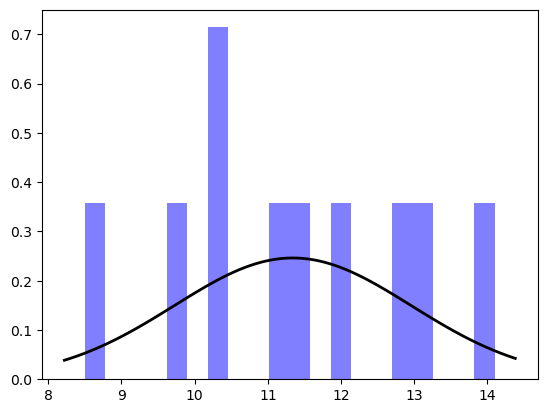

In [15]:
""" encontrar uma distribuição estatística que melhor represente uma lista 
de valores usando Python. Uma abordagem comum para fazer isso é ajustar os dados a 
diferentes distribuições de probabilidade e escolher a distribuição que melhor se ajusta
aos seus dados com base em critérios como o coeficiente de determinação (R²), o teste de 
aderência de Kolmogorov-Smirnov ou o critério de informação Akaike (AIC).

Aqui está um exemplo de como fazer isso usando a biblioteca scipy.stats:
"""
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Suponha que você tenha uma lista de valores 'data'
data = [10.2, 11.5, 12.8, 9.7, 11.2, 14.1, 8.5, 10.3, 13.0, 12.1]

# Ajustar os dados a diferentes distribuições
distributions = [stats.norm, stats.expon, stats.gamma, stats.lognorm]

best_fit = None
best_params = None
best_sse = float('inf')

for distribution in distributions:
    params = distribution.fit(data)
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    pdf = distribution.pdf(data, loc=loc, scale=scale, *arg)
    sse = np.sum((pdf - data)**2)
    
    if sse < best_sse:
        best_fit = distribution
        best_params = params
        best_sse = sse

# Agora você tem a melhor distribuição encontrada e seus parâmetros
print("Melhor Distribuição:", best_fit.name)
print("Melhores Parâmetros:", best_params)

# Você pode plotar o histograma dos dados e a PDF da melhor distribuição
plt.hist(data, bins=20, density=True, alpha=0.5, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = best_fit.pdf(x, *best_params)
plt.plot(x, p, 'k', linewidth=2)
plt.show()


In [21]:
# Escreve o df na tabela serv_campo 

df.to_sql('serv_campo', cnx, if_exists='replace', index=False)

cnx.close()